In [ ]:
import os
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

In [149]:
models_folder_path = 'classifiers/official'
model_names = os.listdir(models_folder_path)
comparable_models = []
for model in model_names:
    if os.path.exists(os.path.join(models_folder_path, model, "classification_report.json")):
        comparable_models.append(model)

comparable_models

['augm_bn',
 'augm_combo',
 'augm_ps',
 'augm_spec_append',
 'augm_ts',
 'carmela',
 'mario',
 'original',
 'original_200_best_snr',
 'test',
 'wabad_all',
 'wabad_augm_ps',
 'wabad_on_minor']

In [5]:
# load all classification report
classification_reports = {}
for model_name in comparable_models:
    with open(f'{models_folder_path}/{model_name}/classification_report.json') as f:
        classification_report = json.load(f)
        classification_reports[model_name] = classification_report

In [ ]:
# with open("./classifiers/official/original/CustomClassifier_Labels.txt") as f:
#     all_species = [line.strip() for line in f.readlines()]

In [133]:
audio_path = "E:/Giacomo/Tovanella/all_segments_5/test"
all_species = os.listdir(audio_path)

# Metrics mean by species

In [134]:
average_metrics_per_species = {}
for species in sorted(list(all_species)):
    precision_values = []
    recall_values = []
    f1_values = []
    support_values = []

    for model_name in comparable_models:
        if species in classification_reports[model_name]:
            metrics = classification_reports[model_name][species]
            precision_values.append(metrics['precision'])
            recall_values.append(metrics['recall'])
            f1_values.append(metrics['f1-score'])
            support_values.append(metrics['support'])
            
    average_metrics_per_species[species] = {
        'average_precision': np.mean(precision_values),
        'average_recall': np.mean(recall_values),
        'average_f1-score': np.mean(f1_values),
        'average_support': np.mean(support_values)
    }

avg_metrics_df = pd.DataFrame(average_metrics_per_species).T
avg_metrics_df

,average_precision,average_recall,average_f1-score,average_support
Certhia familiaris_Eurasian Treecreeper,0.418981,0.166667,0.210079,10.166667
Dendrocopos major_Great Spotted Woodpecker,0.932378,0.521212,0.645021,15.000000
Dryocopus martius_Black Woodpecker,0.758658,0.393939,0.496440,12.000000
Erithacus rubecula_European Robin,0.292190,0.338566,0.250508,90.416667
Fringilla coelebs_Common Chaffinch,0.849335,0.543716,0.634092,890.454545
Lophophanes cristatus_Crested Tit,0.349351,0.072727,0.112984,10.000000
Loxia curvirostra_Common Crossbill,0.416417,0.637807,0.486857,27.454545
Muscicapa striata_Spotted Flycatcher,0.000000,0.000000,0.000000,2.000000
Pecking_,0.222106,0.587413,0.320227,13.000000
Periparus ater_Coal Tit,0.677354,0.294124,0.381333,47.166667


# Mean Variation from original model

In [135]:
models_to_compare = comparable_models[:]
models_to_compare.remove("original")  # Rimuoviamo il modello di riferimento
    
# Dizionario per memorizzare i risultati
variations = {model: {"precision": [], "recall": [], "f1-score": []} for model in models_to_compare}

# Iterare sulle specie presenti nel modello originale
for species in classification_reports["original"].keys():
    for model in models_to_compare:
        if species in classification_reports[model]:  # Controllo per evitare errori
            for metric in ["precision", "recall", "f1-score"]:
                orig_value = classification_reports["original"][species][metric]
                model_value = classification_reports[model][species][metric]
                variation = model_value - orig_value
                variations[model][metric].append(variation)

# Calcolare la variazione media per ogni metrica e modello
mean_variations = {}
for model, metrics in variations.items():
    mean_variations[model] = {metric: sum(values) / len(values) if values else 0 for metric, values in metrics.items()}

# Stampare i risultati
data_metrics = pd.DataFrame(mean_variations)
data_metrics.T

,precision,recall,f1-score
augm_bn,0.049152,0.029351,0.039105
augm_ps,0.014896,0.040146,0.033538
augm_spec_append,-0.035227,-0.022479,-0.004427
augm_ts,0.006286,0.044851,0.032769
carmela,0.292086,0.223711,0.265636
maurizio,-0.059794,-0.007147,-0.012220
original_200_best_snr,-0.004631,-0.107356,-0.053698
test,0.077700,-0.164108,-0.087169
wabad_all,0.038115,0.006679,0.027579
wabad_augm_ps,-0.002401,0.110889,0.082664


# Metrics by models

In [136]:
classification_reports["augm_bn"].keys()

dict_keys(['Certhia familiaris_Eurasian Treecreeper', 'Dendrocopos major_Great Spotted Woodpecker', 'Dryocopus martius_Black Woodpecker', 'Erithacus rubecula_European Robin', 'Fringilla coelebs_Common Chaffinch', 'Lophophanes cristatus_Crested Tit', 'Loxia curvirostra_Common Crossbill', 'Muscicapa striata_Spotted Flycatcher', 'Pecking_', 'Periparus ater_Coal Tit', 'Rain_', 'Regulus ignicapilla_Common Firecrest', 'Regulus regulus_Goldcrest', 'Sylvia atricapilla_Eurasian Blackcap', 'Troglodytes troglodytes_Eurasian Wren', 'Turdus merula_Eurasian Blackbird', 'Turdus philomelos_Song Thrush', 'Vegetation_', 'Wind_', 'micro avg', 'macro avg', 'weighted avg', 'samples avg'])

In [137]:
results = []

for model_name, report in classification_reports.items():
    df = pd.DataFrame(report).T
    df_species = df[~df.index.isin(['micro avg', 'macro avg', 'weighted avg', 'samples avg'])]

    weighted_precision = (df_species["precision"] * df_species["support"]).sum() / df_species["support"].sum()
    weighted_recall = (df_species["recall"] * df_species["support"]).sum() / df_species["support"].sum()
    weighted_f1 = (df_species["f1-score"] * df_species["support"]).sum() / df_species["support"].sum()

    results.append({
        "Model Name": model_name,
        "Precision": round(weighted_precision, 4),
        "Recall": round(weighted_recall, 4),
        "F1-score": round(weighted_f1, 4),
    })

# Creare tabella finale
df_summary = pd.DataFrame(results)
df_summary.sort_values("F1-score", ascending=False)

,Model Name,Precision,Recall,F1-score
4,carmela,0.8667,0.5613,0.6631
9,wabad_all,0.6083,0.5389,0.5260
0,augm_bn,0.5926,0.5573,0.5219
11,wabad_on_minor,0.5983,0.5114,0.5069
10,wabad_augm_ps,0.5792,0.5197,0.5049
2,augm_spec_append,0.5775,0.5133,0.4994
6,original,0.5958,0.5197,0.4989
1,augm_ps,0.5953,0.5104,0.4941
3,augm_ts,0.5963,0.4881,0.4797
5,maurizio,0.5601,0.3352,0.3473


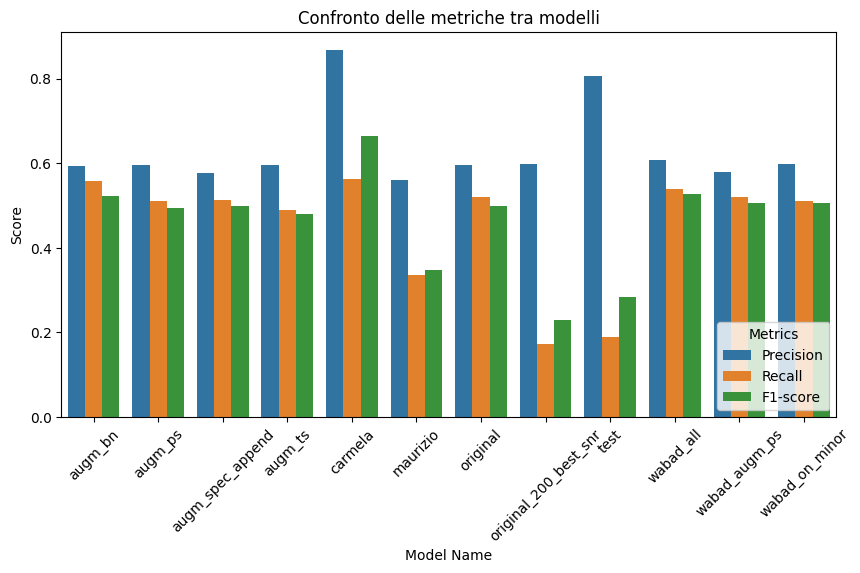

In [138]:
plt.figure(figsize=(10, 5))
df_melted = df_summary.melt(id_vars=["Model Name"], value_vars=["Precision", "Recall", "F1-score"])
sns.barplot(x="Model Name", y="value", hue="variable", data=df_melted)

plt.title("Confronto delle metriche tra modelli")
plt.ylabel("Score")
plt.xlabel("Model Name")
plt.xticks(rotation=45) 
plt.legend(title="Metrics", loc="lower right")
plt.show()

# ROC AUC comparisons

In [139]:
roc_curves = {}
for model_name in comparable_models:
    if os.path.exists(os.path.join(models_folder_path, model_name, "roc_auc.json")):
        with open(os.path.join(models_folder_path, model_name, "roc_auc.json"), "r") as f:
            roc_curves[model_name] = json.load(f)

In [140]:
roc_results = []
for model_name, roc_data in roc_curves.items():
    auc_values = [specie_data["auc"] for specie_name, specie_data in roc_data.items() if specie_name in all_species]
    mean_auc = sum(auc_values) / len(auc_values)
    roc_results.append({
        "Model Name": model_name,
        "Mean AUC": round(mean_auc, 4),
        "Species Count": len(auc_values)  # Numero di specie nel dataset
    })

# Creare DataFrame e salvare
df_auc = pd.DataFrame(roc_results)
df_auc.sort_values("Mean AUC", ascending=False)

,Model Name,Mean AUC,Species Count
3,carmela,0.6759,19
9,wabad_augm_ps,0.6660,19
10,wabad_on_minor,0.6470,19
4,maurizio,0.6373,19
2,augm_ts,0.6338,19
0,augm_bn,0.6335,19
1,augm_ps,0.6316,19
6,original_200_best_snr,0.6290,19
8,wabad_all,0.6199,19
5,original,0.6167,19


# t-test on different models

In [141]:
experiments = {}
for model in comparable_models:
    experiments[model] = {}
    # experiments[model]["roc"] = roc_curves[model]
    experiments[model]["class_report"] = classification_reports[model]

In [143]:
# for each model, associate an array of f1 scores for each specie
model_f1_scores = {}
for model in comparable_models:
    f1_scores = []
    for specie in all_species:
        if specie in classification_reports[model]:
            f1_scores.append(classification_reports[model][specie]["f1-score"])
        else:
            f1_scores.append(0)
    model_f1_scores[model] = f1_scores

In [144]:
# check normality, if p-value < 0.05 then the distribution is not normal
from scipy.stats import shapiro

for model, scores in model_f1_scores.items():
    stat, p = shapiro(scores)
    print(f"{model}: p-value = {p}")

augm_bn: p-value = 0.44466066360473633
augm_ps: p-value = 0.6545271873474121
augm_spec_append: p-value = 0.25400468707084656
augm_ts: p-value = 0.7179412841796875
carmela: p-value = 2.0672672690125182e-05
maurizio: p-value = 0.5214508771896362
original: p-value = 0.14595451951026917
original_200_best_snr: p-value = 0.16596370935440063
test: p-value = 0.0015042893355712295
wabad_all: p-value = 0.32436469197273254
wabad_augm_ps: p-value = 0.5286898016929626
wabad_on_minor: p-value = 0.39520201086997986


# Wilcoxin Test

In [145]:
import numpy as np
from scipy.stats import wilcoxon

wilcoxon_results = []
base_model_name = "original"
for model_name in models_to_compare:
    if model_name == base_model_name:
        continue
    
    f1_model_A = model_f1_scores[base_model_name]
    f1_model_B = model_f1_scores[model_name]
    t_stat, p_value = wilcoxon(f1_model_A, f1_model_B)

    wilcoxon_results.append({
        "Model Name": model_name,
        "t-statistic": round(t_stat, 4),
        "p-value": round(p_value, 4),
        "Significativo?": "Sì" if p_value < 0.05 else "No"
    })

# Crea DataFrame e salva
df_ttest = pd.DataFrame(wilcoxon_results)
df_ttest.sort_values("p-value")

c:\Users\giaco\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:3145: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


,Model Name,t-statistic,p-value,Significativo?
10,wabad_on_minor,26.0,0.0299,Sì
9,wabad_augm_ps,28.0,0.0386,Sì
0,augm_bn,21.0,0.0480,Sì
8,wabad_all,23.0,0.1159,No
1,augm_ps,37.0,0.1914,No
7,test,56.0,0.3318,No
5,maurizio,48.0,0.4955,No
3,augm_ts,58.0,0.6051,No
4,carmela,63.0,0.7960,No
2,augm_spec_append,51.0,0.9250,No


In [146]:
from scipy.stats import ttest_ind

t_test_results = []
base_model_name = "original"
for model_name in models_to_compare:
    if model_name == base_model_name:
        continue
    
    base_model = model_f1_scores[base_model_name]
    other_model = model_f1_scores[model_name]
    t_stat, p_value = ttest_ind(base_model, other_model, equal_var=False)

    # Salva i risultati
    t_test_results.append({
        "Model Name": model_name,
        "t-statistic": round(t_stat, 4),
        "p-value": round(p_value, 4),
        "Significativo?": "Sì" if p_value < 0.05 else "No"
    })

# Crea DataFrame e salva
df_ttest = pd.DataFrame(t_test_results)
df_ttest.sort_values("p-value")

,Model Name,t-statistic,p-value,Significativo?
10,wabad_on_minor,-1.2990,0.2023,No
9,wabad_augm_ps,-1.2673,0.2133,No
7,test,0.9222,0.3627,No
3,augm_ts,-0.6014,0.5514,No
1,augm_ps,-0.5778,0.5670,No
0,augm_bn,-0.5640,0.5763,No
4,carmela,0.4580,0.6502,No
8,wabad_all,-0.3734,0.7111,No
6,original_200_best_snr,0.3666,0.7161,No
5,maurizio,-0.1006,0.9204,No


In [147]:
from scipy.stats import bootstrap

n_resamples = 10000  

# Bootstrap con metodo BCA (bias-corrected and accelerated)
ci = bootstrap((model_f1_scores["carmela"],), np.mean, confidence_level=0.95, n_resamples=n_resamples, method='BCa')

# Output intervallo di confidenza
print(f"Intervallo di confidenza 95% per F1-score: {ci.confidence_interval}")

Intervallo di confidenza 95% per F1-score: ConfidenceInterval(low=0.09536662168241117, high=0.4045798337391486)
